In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('bank_full.csv')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.shape

(45211, 17)

In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
numcols = data.select_dtypes(include=np.number)
objcols = data.select_dtypes(include=['object'])

In [8]:
numcols.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
objcols.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [22]:
objcols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [24]:
numcols.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [26]:
objcols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [27]:
objcols['day'] = numcols.day

In [28]:
numcols = numcols.drop('day',axis = 1)

In [29]:
objcols = objcols.drop('y', axis = 1)

<Axes: >

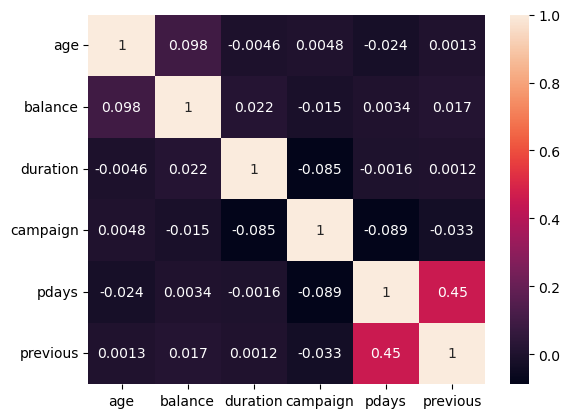

In [31]:
sns.heatmap(numcols.corr(), annot=True)

In [32]:
objcols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'day'],
      dtype='object')

In [35]:
objcols_dummy = pd.get_dummies(objcols, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome','day'])

In [36]:
objcols_dummy.shape

(45211, 75)

In [38]:
numcols.head()

,age,balance,duration,campaign,pdays,previous
0,58,2143,261,1,-1,0
1,44,29,151,1,-1,0
2,33,2,76,1,-1,0
3,47,1506,92,1,-1,0
4,33,1,198,1,-1,0


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
stdscaler = StandardScaler()

In [43]:
numcols[['age', 'balance', 'duration']] = stdscaler.fit_transform(numcols[['age', 'balance', 'duration']])

In [44]:
numcols.head()

,age,balance,duration,campaign,pdays,previous
0,1.606965,0.256419,0.011016,1,-1,0
1,0.288529,-0.437895,-0.416127,1,-1,0
2,-0.747384,-0.446762,-0.707361,1,-1,0
3,0.571051,0.047205,-0.645231,1,-1,0
4,-0.747384,-0.447091,-0.233620,1,-1,0


In [65]:
X = pd.concat([numcols,objcols_dummy],axis=1)

In [66]:
X.shape

(45211, 81)

In [67]:
y = data.y

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le = LabelEncoder()

In [70]:
y = le.fit_transform(data.y)

In [71]:
from sklearn.linear_model import LogisticRegression

In [75]:
logit = LogisticRegression(max_iter=1000)

In [76]:
logitmodel = logit.fit(X,y)

In [77]:
logitmodel.score(X,y)

0.9027006701908827

In [78]:
logitpredict = logitmodel.predict(X)

In [79]:
logitpredict

array([0, 0, 0, ..., 1, 0, 0])

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

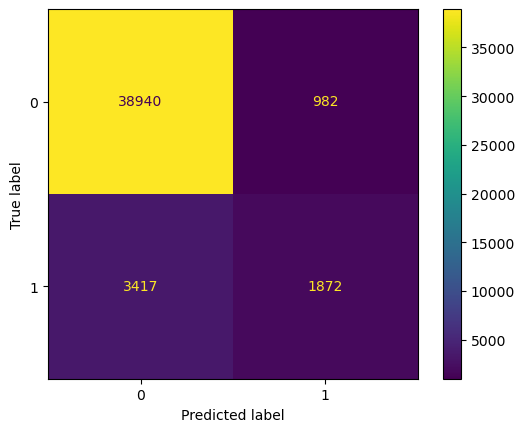

In [82]:
ConfusionMatrixDisplay.from_predictions(y,logitpredict)

In [84]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.66      0.35      0.46      5289

    accuracy                           0.90     45211
   macro avg       0.79      0.66      0.70     45211
weighted avg       0.89      0.90      0.89     45211



In [85]:
from sklearn.metrics import RocCurveDisplay

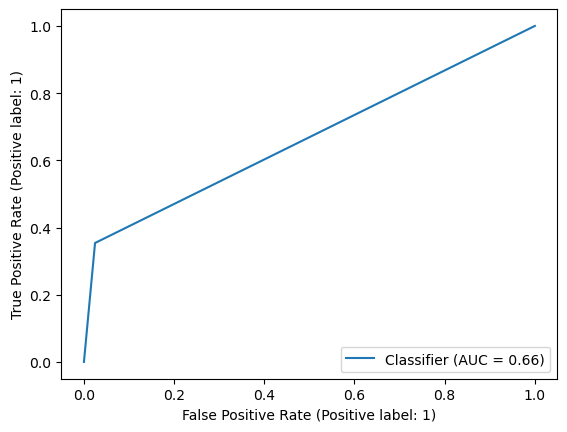

In [88]:
RocCurveDisplay.from_predictions(y,logitpredict)

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
tree = DecisionTreeClassifier(max_depth=6)

In [111]:
treemodel = tree.fit(X,y)

In [112]:
treemodel.score(X,y) # Accuracy is 100%

0.9061953949260135

In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
cross_val_score(tree,X,y)

array([0.88311401, 0.73501438, 0.74408317, 0.49236894, 0.79407211])

In [115]:
np.mean([0.88311401, 0.73501438, 0.74408317, 0.49236894, 0.79407211])

0.729730522

In [116]:
cross_val_score(logit,X,y)

array([0.89262413, 0.85711126, 0.83709356, 0.58228268, 0.34129617])

In [117]:
np.mean([0.89262413, 0.85711126, 0.83709356, 0.58228268, 0.34129617])

0.7020815600000001

In [118]:
treepredict = treemodel.predict(X)

In [120]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     39922
           1       0.66      0.41      0.50      5289

    accuracy                           0.91     45211
   macro avg       0.79      0.69      0.73     45211
weighted avg       0.89      0.91      0.90     45211



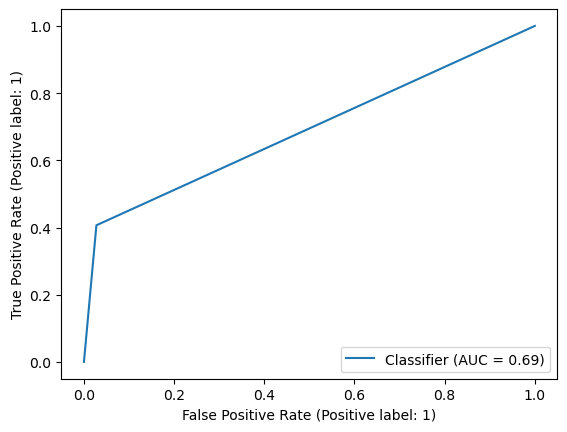

In [121]:
RocCurveDisplay.from_predictions(y,treepredict)

In [126]:
pd.set_option("Display.max_rows", 81)
pd.DataFrame(treemodel.feature_importances_,X.columns).sort_values(by=0,ascending=False)

,0
duration,0.521470
poutcome_success,0.279832
housing_no,0.044393
pdays,0.043212
age,0.032028
month_mar,0.025065
contact_unknown,0.012476
month_oct,0.009173
balance,0.006610
month_may,0.005269


In [140]:
from sklearn.tree import plot_tree,export_text

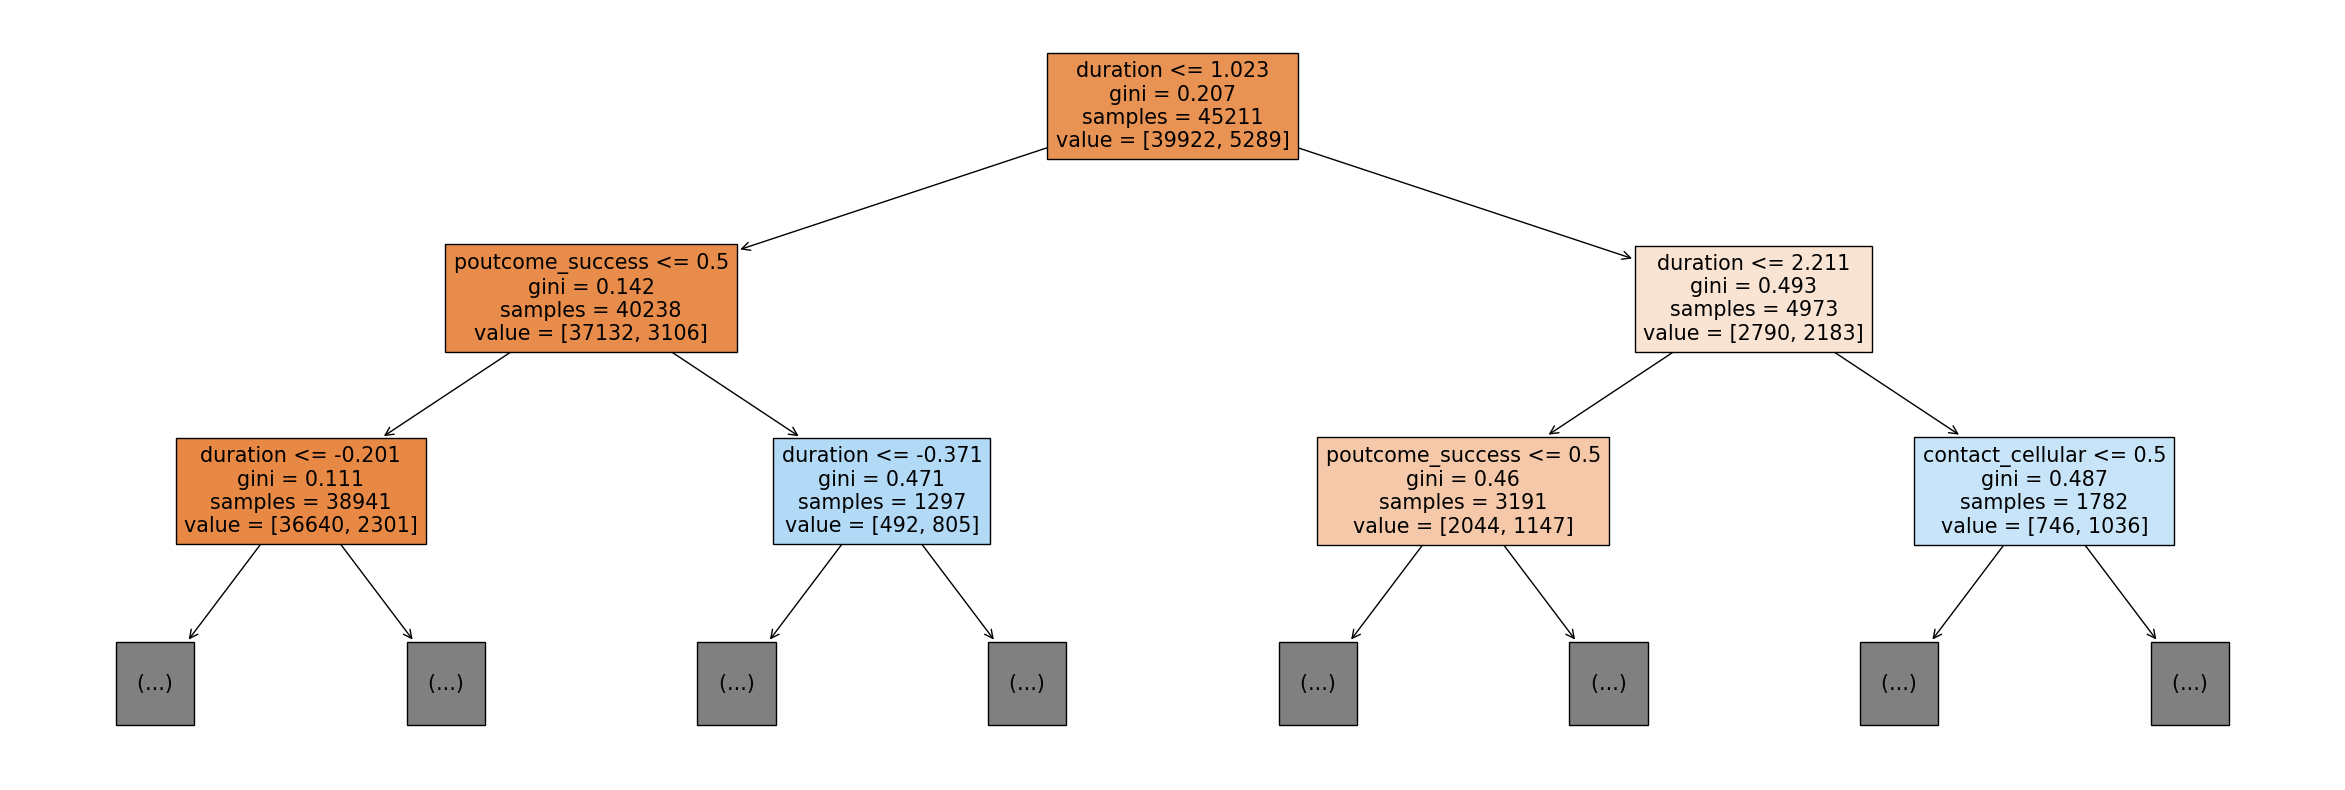

In [137]:
plt.figure(figsize=(30,10))
plot_tree(treemodel,max_depth=2, feature_names=X.columns,filled=True)
plt.show()

In [142]:
print(export_text(treemodel, feature_names=list(X.columns)))

|--- duration <= 1.02
|   |--- poutcome_success <= 0.50
|   |   |--- duration <= -0.20
|   |   |   |--- month_mar <= 0.50
|   |   |   |   |--- month_oct <= 0.50
|   |   |   |   |   |--- age <= 1.84
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  1.84
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- month_oct >  0.50
|   |   |   |   |   |--- duration <= -0.63
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- duration >  -0.63
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- month_mar >  0.50
|   |   |   |   |--- duration <= -0.59
|   |   |   |   |   |--- balance <= -0.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- balance >  -0.45
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- duration >  -0.59
|   |   |   |   |   |--- campaign <= 5.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- campaign >  5.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- duration >  -0.20
|   |   |   |--- housing